p_value = 0.05

answer: 
* значение статистики при проверке гипотезы об однородности вида смещение
* p-значение статистики при проверке гипотезы об однородности вида смещение
* итоговая гипотеза при проверке гипотезы об однородности вида смещение (0 или 1)
* значение статистики при проверке гипотезы об однородности вида сжатие/растяжение
* p-значение статистики при проверке гипотезы об однородности вида сжатие/растяжение
* итоговая гипотеза при проверке гипотезы об однородности вида сжатие/растяжение (0 или 1)

## Теоретическая справка

Пусть даны две выборки:$$X_m = {x_1, x_2, \ldots, x_m}\\Y_n = {y_1, y_2, \ldots, y_n}$$

Здесь и далее будем предполагать независимость выборок, иначе критерии не имеют смысла.

### Критерий Стьюдента

**Используется** для проверки гипотезы о смещении (равенстве средних).

**Предположение:** Обе выборки получены из нормального распределения, при этом их дисперсии равны.

**Статистика:** $$T = \frac{\overline{Y_n} - \overline{X_m}}{S_N \sqrt{\frac1n + \frac1m}}$$
$$S_N = \frac{1}{N-2}\left[\sum_{i=1}^m(x_i-\overline x)^2 + \sum_{i=1}^n(y_i-\overline y)^2\right]$$

Имеет распределение Стьюдента с $N-2$ степенями свободы. Однако при большом $N$ ($>50$ точно) можно использовать нормальное распределение.

**p_value:** Если альтернативная гипотеза имеет вид $E[X] \neq E[Y]$, то критическая область двусторонняя и p уровень значимости равен удвоенной вероятности отклонится от $|T|$ вправо (или от -|T| влево). Если другая альтернативная гипотеза, то p уровень значимости не удваивается.

### Критерий Вилконсона

**Используется** для проверки равенства средних, если выборки не имеют нормальное распределение. Реализовывать самому не надо, используем встроенный критерий **Манна-Уитни**

### Критерий Фишера

**Используется** для проверки гипотезы о равенстве дисперсий.

**Предположение:** Обе выборки получены из нормального распределения.

**Статистика:** $$T = \frac{s^2_y}{s^2_x} \sim F(n-1, m-1)$$

**p_value:** Если альтернативная гипотеза имеет вид $D[X] \neq D[Y]$, то статистика имеет распределение $F(n-1, m-1)$, если $s^2_y > s^2_x$ и распределение $F(m-1, n-1)$ иначе. o уровень значимости равен вероятности отклониться от $T$ вправо

### Критерий Ансари-Бредли

**Используется** для проверки гипотезы о равенстве дисперсий.

**Статистика:**
$$A_{m,n} = \sum_{i=1}^m\left(\frac{N+1}{2} - \left|R_i - \frac{N+1}{2}\right|\right)$$

Эта статистика при малых $m$ и $n$ имеет своё собственное специальное распределение и соответствующую таблицу для уровней значимости, но нас интересует нормальная апроксимация.

**Стандартизация:**

$$\mu (A_{m,n}) = 
\begin{cases}
\frac{m(N+2)}{4}, & \text{если N - четное} \\
\frac{m(N+2)^2}{4N},& \text{если N - нечетное}
\end{cases}$$

Если нет связок, то дисперсия:
$$
D(A_{m,n}) =
\begin{cases}
\frac{mn(N+2)(N-2)}{48(N-1)}, & \text{если N - четное} \\
\frac{mn(N^2+3)(N+1)}{48N^2}, & \text{если N - нечетное}
\end{cases}$$

Если есть связки, то дисперсия:
$$
D(A_{m,n}) =
\begin{cases}
\frac{mn\left(16\sum\limits_{j=1}^k (t_jR_j^2)-N(N+2)^2)    \right)}{16N(N-1)}, & \text{если N - четное} \\
\frac{mn\left(16N\sum\limits_{j=1}^k (t_jR_j^2)- (N+1)^4)    \right)}{16N^2(N-1)}, & \text{если N - нечетное}
\end{cases}$$

Тогда нормальная статистика:

$$A_{m, n}^* = \frac{A_{m,n} - \mu(A_{m,n})}{\sqrt{D(A_{m,n})}}$$

Стандартизованная статистика имеет нормальное распределение.

**p_value:** Если альтернативная гипотеза имеет вид $D[X] \neq D[Y]$, то имеем дело с двусторонним тестом и p уровень значимости вычисляется так же, как в критерии Стьюдента, только используется нормальное распределение, а не распределение Стьюдента

### Критерий Шапиро-Уилка

Используется для проверки гипотезы о нормальном распределении. Самому реализовывать не надо, используем встроенный.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
X = pd.read_csv('../data/lw3/projects/1032172712/sample1.csv', header=None).to_numpy().ravel()
Y = pd.read_csv('../data/lw3/projects/1032172712/sample2.csv', header=None).to_numpy().ravel()

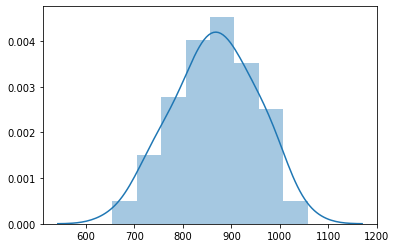

In [3]:
sns.distplot(X)

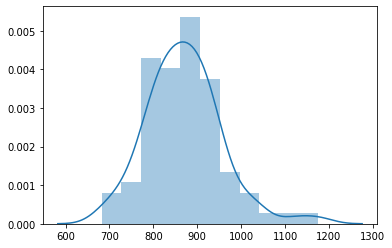

In [4]:
sns.distplot(Y)

In [5]:
stats.shapiro(X)

(0.9914084672927856, 0.8807798624038696)

In [6]:
stats.shapiro(Y)

(0.9687540531158447, 0.040780242532491684)

In [7]:
stats.mannwhitneyu(X, Y, alternative='two-sided')

MannwhitneyuResult(statistic=3281.0, pvalue=0.9946527970806632)

In [8]:
Y.mean(), X.mean()

(870.1084337349398, 865.5316455696203)

In [9]:
stats.ttest_ind(X, Y)

Ttest_indResult(statistic=-0.3402101928376321, pvalue=0.7341444780729718)

In [20]:
stats.t.ppf(0.05, 50)

-1.6759050245283318

In [10]:
stats.ttest_ind()

TypeError: ttest_ind() missing 2 required positional arguments: 'a' and 'b'

### T-test

In [11]:
m = X.size
n = Y.size
N = m + n
x_mean = X.mean()
y_mean = Y.mean()
s1, s2 = 0, 0
for x in X:
    s1 += (x - x_mean) ** 2
for y in Y:
    s2 += (y - y_mean) ** 2
s_n = np.sqrt((s1 + s2) / (N - 2))
T = (y_mean - x_mean) / (s_n * np.sqrt(1 / n + 1 / m))
p_value = 2 * (1 - stats.t.cdf(T, N - 2))
T, p_value

(0.340210192837632, 0.734144478072972)

### F-test

In [25]:
fdistribution = stats.f(m-1,n-1)
1 - fdistribution.cdf(F)

0.4442072702286284

In [27]:
1 - stats.f.cdf(1.07, 50, 50)

0.4059429188793833

In [32]:
x_var = stats.tvar(X)
y_var = stats.tvar(Y)
F = y_var / x_var
p_value = 1 - stats.f.cdf(F, n - 1, m - 1)
F, p_value

(1.031547480323786, 0.44569718250918855)

In [35]:
stats.f.sf(x_var/y_var, m - 1, n - 1)

0.5543028174908115

In [29]:
stats.f_oneway(Y, X)

F_onewayResult(statistic=0.11574297531061915, pvalue=0.7341444780729839)

### Ansari-bradley test

In [59]:
stats.ansari(X, Y)

AnsariResult(statistic=3114.0, pvalue=0.40210918494512027)

In [108]:
np.median(X), np.median(Y)

(869.0, 863.0)

In [63]:
np.unique(X).size == X.size, np.unique(Y).size == Y.size

(False, False)

In [211]:
Z = np.hstack([X, Y])
R = stats.rankdata(Z)

In [212]:
A = 0
for i in range(m):
    A += (N + 1) / 2 - np.abs(R[i] - (N + 1) / 2)
A

3114.0

In [213]:
A_mean = m * (N + 2) / 4 if N % 2 == 0 else m * (N + 1) ** 2 / (4 * N)
A_mean

3239.0

In [229]:
Counter(R).most_common()

[(100.5, 4),
 (57.0, 3),
 (80.0, 3),
 (139.0, 3),
 (37.0, 3),
 (45.5, 2),
 (8.5, 2),
 (32.5, 2),
 (89.5, 2),
 (124.5, 2),
 (108.5, 2),
 (61.5, 2),
 (67.5, 2),
 (71.5, 2),
 (75.5, 2),
 (103.5, 2),
 (128.5, 2),
 (121.5, 2),
 (119.5, 2),
 (97.5, 2),
 (22.5, 2),
 (24.5, 2),
 (110.5, 2),
 (77.5, 2),
 (42.5, 2),
 (39.5, 2),
 (106.5, 2),
 (134.5, 2),
 (114.5, 2),
 (26.5, 2),
 (137.0, 1),
 (136.0, 1),
 (127.0, 1),
 (87.0, 1),
 (54.0, 1),
 (156.0, 1),
 (160.0, 1),
 (34.0, 1),
 (41.0, 1),
 (51.0, 1),
 (17.0, 1),
 (126.0, 1),
 (20.0, 1),
 (4.0, 1),
 (53.0, 1),
 (144.0, 1),
 (95.0, 1),
 (5.0, 1),
 (146.0, 1),
 (15.0, 1),
 (153.0, 1),
 (1.0, 1),
 (92.0, 1),
 (65.0, 1),
 (131.0, 1),
 (151.0, 1),
 (150.0, 1),
 (29.0, 1),
 (64.0, 1),
 (74.0, 1),
 (147.0, 1),
 (28.0, 1),
 (10.0, 1),
 (49.0, 1),
 (118.0, 1),
 (116.0, 1),
 (148.0, 1),
 (18.0, 1),
 (96.0, 1),
 (141.0, 1),
 (155.0, 1),
 (105.0, 1),
 (55.0, 1),
 (19.0, 1),
 (145.0, 1),
 (73.0, 1),
 (85.0, 1),
 (16.0, 1),
 (152.0, 1),
 (113.0, 1),
 (7.0, 1),

In [249]:
ttt = 0
for val, count in Counter(R).most_common():
    if count == 1:
        break
    ttt = ttt + (count * val * val)

In [272]:
special_s = 0
k = 0
for x, t in Counter(R).most_common():
    special_s += t * x ** 2
    k += 1
special_s

1430299.5

In [222]:
m, n

(79, 83)

In [224]:
N

162

In [231]:
k

30

In [271]:
16 * special_s, N * (N + 2) ** 2

(22884792.0, 4357152)

In [273]:
A_var = m * n * (16 * special_s -  N * (N + 2) ** 2) / 16 / N / (N - 1)
A_var

291114.886415919

In [255]:
A_var = 0
if (np.unique(X).size == X.size and np.unique(Y).size == Y.size):
    A_var = m * n * (N + 2) * (N - 2) / (48 * (N - 1)) if N % 2 == 0 else m * n * ((N ** 2) + 3) * (N + 1) / (48 * (N ** 2))
else:
    A_var = m * n * (16 * special_s - N * (N + 2) ** 2) / (16 * N * (N - 1)) if N % 2 == 0 else m * n * (16 * N * special_s - (N + 1) ** 4) / (16 * N ** 2 * (N - 1))

In [256]:
A_var

59776.87717583007

In [217]:
A

3114.0

In [260]:
bb = 0
for i in range(N):
    bb += min(R[i], N + 1 - R[i]) ** 2
A_var = m * n * (16 * bb - N * (N + 2) ** 2) / 16 / N / (N - 1)

In [261]:
A_new = (A - A_mean) / np.sqrt(A_var)
A_new

-0.8378602692922401

In [263]:
2 * stats.norm.cdf(A_new), stats.ansari(X, Y)[1]

(0.40210918494512027, 0.40210918494512027)

.....

In [203]:
stats.ansari(X, Y)

AnsariResult(statistic=3114.0, pvalue=0.40210918494512027)

In [240]:
Z = np.hstack([X, Y])
R = stats.rankdata(Z)

In [241]:
A = 0
for i in range(m):
    A += ((N + 1) / 2 - np.abs(R[i] - (N + 1) / 2))
A

3114.0

In [242]:
N

162

In [243]:
A_mean = m * (N + 2) / 4
A_mean

3239.0

In [244]:
A_var = m * n * (N + 2) * (N - 2) / 48 / (N - 1)
A_var

22263.933747412008

In [245]:
A_new = (A - A_mean) / np.sqrt(A_var)
A_new

-0.8377396337057371

In [246]:
2 * stats.norm.cdf(A_new)

0.4021769487761775

In [167]:
rank = stats.rankdata(Z)
#symrank = amin(array((rank,N-rank+1)),0)

In [274]:
np.amin(np.array((rank, N - rank + 1)), 0) == stats.rankdata(Z, method='ordinal')

array([False, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False,  True,  True, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
        True, False, False, False, False,  True, False,  True, False,
       False, False,

In [275]:
np.amin(np.array((rank, N - rank + 1)), 0)

array([45.5, 57. , 26. , 27. , 80. , 36. , 76. ,  8.5, 54. , 32.5,  7. ,
        3. , 34. , 41. , 51. , 17. , 37. , 20. ,  4. , 53. , 19. , 68. ,
        5. , 17. , 15. , 73.5, 38.5, 54.5, 24. , 10. ,  1. , 71. , 65. ,
       32. , 12. , 13. , 73.5, 29. , 64. , 74. , 16. , 61.5, 28. , 10. ,
       49. , 32.5, 45. , 47. , 37. , 15. , 18. , 62.5, 67. , 22. ,  8. ,
       67.5, 71.5, 58. , 55. , 75.5, 62.5, 57. , 19. ,  8.5, 62.5, 18. ,
       73. , 59.5, 78. , 16. , 11. , 50. ,  7. , 34.5, 41.5, 43.5, 60. ,
       21. , 77. , 65.5, 50. , 37. , 75. , 65.5, 22.5, 44. , 24.5, 52.5,
       77.5, 22.5,  4. , 42.5, 54.5, 24.5, 77.5, 35. , 61.5, 14. , 80. ,
       69. , 80. , 72. ,  6. , 39.5, 75.5, 39.5, 43.5, 46. , 67.5, 71.5,
        6. , 41.5, 51. , 45.5, 70. , 81. , 63. , 59. , 24. , 33. , 56.5,
       28.5, 13. , 52.5, 11. , 34.5, 37. , 40. , 59.5, 57. , 47. ,  5. ,
       48.5,  3. , 26.5, 31. , 52. , 62.5, 42.5, 30. , 69. , 48. , 14. ,
        9. , 70. , 48.5, 26.5,  1. , 38.5, 79. , 20

In [282]:
stats.rankdata(X)

array([22. , 28.5, 65. , 64. , 39. , 61. , 42. ,  5.5, 26. , 17.5, 78. ,
       79. , 19. , 21. , 24. , 10. , 60. , 13. ,  2. , 25. , 68. , 46. ,
        3. , 70. ,  8. , 43.5, 59. , 53. , 66. , 76. ,  1. , 45. , 33. ,
       63. , 74. , 73. , 43.5, 16. , 32. , 37. , 71. , 31. , 15. ,  7. ,
       23. , 17.5, 56. , 55. , 20. , 72. , 11. , 49. , 47. , 67. , 77. ,
       34. , 35. , 52. , 27. , 38. , 49. , 28.5, 12. ,  5.5, 49. , 69. ,
       36. , 51. , 40. ,  9. , 75. , 54. ,  4. , 62. , 58. , 57. , 30. ,
       14. , 41. ])

In [281]:
stats.rankdata(Y)

array([50.5, 27. , 17.5, 46. , 50.5,  8.5, 23. , 10.5, 57.5, 39.5,  8.5,
       81. , 21.5, 56. , 10.5, 39.5, 16. , 31. ,  7. , 41.5, 35. , 44. ,
       47. , 79. , 19.5, 38. , 19.5, 63. , 62. , 34. , 37. ,  3. , 64. ,
       59. , 24. , 36. , 43. , 32. , 30. , 73.5, 68. , 54.5, 71.5,  6. ,
       57.5,  4. , 67. , 17.5, 65. , 53. , 29. , 25. , 80. , 60.5,  2. ,
       12.5, 69. , 28. , 52. , 21.5, 70. , 49. , 26. , 77. , 78. , 48. ,
       60.5, 12.5, 83. , 66. , 45. , 76. , 54.5, 75. ,  1. , 33. , 71.5,
       41.5,  5. , 15. , 82. , 73.5, 14. ])

In [276]:
np.array((rank, N - rank + 1))

array([[ 45.5,  57. , 137. , 136. ,  80. , 127. ,  87. ,   8.5,  54. ,
         32.5, 156. , 160. ,  34. ,  41. ,  51. ,  17. , 126. ,  20. ,
          4. ,  53. , 144. ,  95. ,   5. , 146. ,  15. ,  89.5, 124.5,
        108.5, 139. , 153. ,   1. ,  92. ,  65. , 131. , 151. , 150. ,
         89.5,  29. ,  64. ,  74. , 147. ,  61.5,  28. ,  10. ,  49. ,
         32.5, 118. , 116. ,  37. , 148. ,  18. , 100.5,  96. , 141. ,
        155. ,  67.5,  71.5, 105. ,  55. ,  75.5, 100.5,  57. ,  19. ,
          8.5, 100.5, 145. ,  73. , 103.5,  85. ,  16. , 152. , 113. ,
          7. , 128.5, 121.5, 119.5,  60. ,  21. ,  86. ,  97.5,  50. ,
         37. ,  88. ,  97.5,  22.5,  44. ,  24.5, 110.5,  77.5,  22.5,
        159. ,  42.5, 108.5,  24.5,  77.5,  35. ,  61.5,  14. ,  80. ,
         69. ,  83. ,  91. , 157. ,  39.5,  75.5,  39.5, 119.5, 117. ,
         67.5,  71.5,   6. , 121.5, 112. ,  45.5,  70. ,  82. ,  63. ,
         59. , 139. , 130. , 106.5, 134.5,  13. , 110.5,  11. , 128.5,
      

In [170]:
rank

array([ 45.5,  57. , 137. , 136. ,  80. , 127. ,  87. ,   8.5,  54. ,
        32.5, 156. , 160. ,  34. ,  41. ,  51. ,  17. , 126. ,  20. ,
         4. ,  53. , 144. ,  95. ,   5. , 146. ,  15. ,  89.5, 124.5,
       108.5, 139. , 153. ,   1. ,  92. ,  65. , 131. , 151. , 150. ,
        89.5,  29. ,  64. ,  74. , 147. ,  61.5,  28. ,  10. ,  49. ,
        32.5, 118. , 116. ,  37. , 148. ,  18. , 100.5,  96. , 141. ,
       155. ,  67.5,  71.5, 105. ,  55. ,  75.5, 100.5,  57. ,  19. ,
         8.5, 100.5, 145. ,  73. , 103.5,  85. ,  16. , 152. , 113. ,
         7. , 128.5, 121.5, 119.5,  60. ,  21. ,  86. ,  97.5,  50. ,
        37. ,  88. ,  97.5,  22.5,  44. ,  24.5, 110.5,  77.5,  22.5,
       159. ,  42.5, 108.5,  24.5,  77.5,  35. ,  61.5,  14. ,  80. ,
        69. ,  83. ,  91. , 157. ,  39.5,  75.5,  39.5, 119.5, 117. ,
        67.5,  71.5,   6. , 121.5, 112. ,  45.5,  70. ,  82. ,  63. ,
        59. , 139. , 130. , 106.5, 134.5,  13. , 110.5,  11. , 128.5,
        37. , 123. ,

In [191]:
ranks_new = np.zeros(Z.size)

In [283]:
if N % 2 == 0:
    for i in range(N // 2):
        ranks_new[i] = i + 1
        ranks_new[-i-1] = i + 1
else:
    for i in range((N - 1) // 2):
        ranks_new[i] = i + 1
        ranks_new[-i-1] = i + 1
    ranks_new[N // 2] = (N + 1) // 2
ranks_new

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 81., 80., 79., 78., 77., 76., 75., 74., 73., 72.,
       71., 70., 69., 68., 67., 66., 65., 64., 63., 62., 61., 60., 59.,
       58., 57., 56., 55., 54., 53., 52., 51., 50., 49., 48., 47., 46.,
       45., 44., 43., 42., 41., 40., 39., 38., 37., 36., 35., 34., 33.,
       32., 31., 30., 29., 28., 27., 26., 25., 24., 23., 22., 21., 20.,
       19., 18., 17., 16., 15., 14., 13., 12., 11., 10.,  9.,  8.,  7.,
        6.,  5.,  4.,  3.,  2.,  1.])

In [198]:
A = np.sum(ranks_new[:m])
A

3160.0

In [286]:
stats.rankdata(np.r_[X, Y])

array([ 45.5,  57. , 137. , 136. ,  80. , 127. ,  87. ,   8.5,  54. ,
        32.5, 156. , 160. ,  34. ,  41. ,  51. ,  17. , 126. ,  20. ,
         4. ,  53. , 144. ,  95. ,   5. , 146. ,  15. ,  89.5, 124.5,
       108.5, 139. , 153. ,   1. ,  92. ,  65. , 131. , 151. , 150. ,
        89.5,  29. ,  64. ,  74. , 147. ,  61.5,  28. ,  10. ,  49. ,
        32.5, 118. , 116. ,  37. , 148. ,  18. , 100.5,  96. , 141. ,
       155. ,  67.5,  71.5, 105. ,  55. ,  75.5, 100.5,  57. ,  19. ,
         8.5, 100.5, 145. ,  73. , 103.5,  85. ,  16. , 152. , 113. ,
         7. , 128.5, 121.5, 119.5,  60. ,  21. ,  86. ,  97.5,  50. ,
        37. ,  88. ,  97.5,  22.5,  44. ,  24.5, 110.5,  77.5,  22.5,
       159. ,  42.5, 108.5,  24.5,  77.5,  35. ,  61.5,  14. ,  80. ,
        69. ,  83. ,  91. , 157. ,  39.5,  75.5,  39.5, 119.5, 117. ,
        67.5,  71.5,   6. , 121.5, 112. ,  45.5,  70. ,  82. ,  63. ,
        59. , 139. , 130. , 106.5, 134.5,  13. , 110.5,  11. , 128.5,
        37. , 123. ,

In [287]:
stats.rankdata(Z)

array([ 45.5,  57. , 137. , 136. ,  80. , 127. ,  87. ,   8.5,  54. ,
        32.5, 156. , 160. ,  34. ,  41. ,  51. ,  17. , 126. ,  20. ,
         4. ,  53. , 144. ,  95. ,   5. , 146. ,  15. ,  89.5, 124.5,
       108.5, 139. , 153. ,   1. ,  92. ,  65. , 131. , 151. , 150. ,
        89.5,  29. ,  64. ,  74. , 147. ,  61.5,  28. ,  10. ,  49. ,
        32.5, 118. , 116. ,  37. , 148. ,  18. , 100.5,  96. , 141. ,
       155. ,  67.5,  71.5, 105. ,  55. ,  75.5, 100.5,  57. ,  19. ,
         8.5, 100.5, 145. ,  73. , 103.5,  85. ,  16. , 152. , 113. ,
         7. , 128.5, 121.5, 119.5,  60. ,  21. ,  86. ,  97.5,  50. ,
        37. ,  88. ,  97.5,  22.5,  44. ,  24.5, 110.5,  77.5,  22.5,
       159. ,  42.5, 108.5,  24.5,  77.5,  35. ,  61.5,  14. ,  80. ,
        69. ,  83. ,  91. , 157. ,  39.5,  75.5,  39.5, 119.5, 117. ,
        67.5,  71.5,   6. , 121.5, 112. ,  45.5,  70. ,  82. ,  63. ,
        59. , 139. , 130. , 106.5, 134.5,  13. , 110.5,  11. , 128.5,
        37. , 123. ,

In [290]:
np.median(X), np.median(Y)

(869.0, 863.0)

In [295]:
X_new = X - (np.median(X) - np.median(Y))
R_new = stats.rankdata(np.hstack([X_new, Y]))

In [296]:
ttt = 0
for val, count in Counter(R_new).most_common():
    if count == 1:
        break
    ttt = ttt + (count * val * val)
A_var = m * n * (16 * ttt -  N * (N + 2) ** 2) / 16 / N / (N - 1)
A_var

68713.12140556706

In [298]:
m, n, N

(79, 83, 162)

In [299]:
N

162

In [302]:
ZZ = np.r_[X, Y]
ZZ

array([ 820,  835,  950,  949,  863,  927,  871,  729,  829,  796, 1019,
       1057,  798,  814,  825,  759,  926,  770,  702,  828,  967,  889,
        708,  972,  753,  878,  925,  899,  954,  995,  655,  880,  845,
        937,  991,  988,  878,  790,  844,  857,  974,  839,  789,  732,
        823,  796,  918,  914,  808,  981,  763,  893,  890,  955, 1000,
        852,  855,  896,  834,  861,  893,  835,  766,  729,  893,  971,
        856,  894,  869,  756,  994,  908,  720,  929,  921,  919,  838,
        771,  870,  892,  824,  808,  874,  892,  774,  816,  781,  902,
        862,  774, 1043,  815,  899,  781,  862,  801,  839,  752,  863,
        853,  865,  879, 1020,  812,  861,  812,  919,  916,  852,  855,
        709,  921,  907,  820,  854,  864,  841,  836,  954,  932,  897,
        945,  748,  902,  737,  929,  808,  924,  894,  835,  821, 1030,
        913,  701,  783,  939,  826,  893,  815,  943,  884,  822,  986,
        999,  882,  913,  783, 1176,  925,  868,  9

In [303]:
ZZ_ranks = []
for i in range(N//2):
    ZZ_ranks.append(i+1)

In [304]:
ZZ_ranks

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81]

In [305]:
ZZ_ranks += ZZ_ranks[::-1]

In [307]:
sum(ZZ_ranks)

6642

In [308]:
A

3114.0

In [321]:
xy = np.r_[X, Y]
rank = stats.rankdata(xy)
symrank = np.amin(np.array((rank,N-rank+1)),0)
AB = np.sum(symrank[:m],axis=0)

In [323]:
AB

3114.0

In [336]:
rank[:m]

array([ 45.5,  57. , 137. , 136. ,  80. , 127. ,  87. ,   8.5,  54. ,
        32.5, 156. , 160. ,  34. ,  41. ,  51. ,  17. , 126. ,  20. ,
         4. ,  53. , 144. ,  95. ,   5. , 146. ,  15. ,  89.5, 124.5,
       108.5, 139. , 153. ,   1. ,  92. ,  65. , 131. , 151. , 150. ,
        89.5,  29. ,  64. ,  74. , 147. ,  61.5,  28. ,  10. ,  49. ,
        32.5, 118. , 116. ,  37. , 148. ,  18. , 100.5,  96. , 141. ,
       155. ,  67.5,  71.5, 105. ,  55. ,  75.5, 100.5,  57. ,  19. ,
         8.5, 100.5, 145. ,  73. , 103.5,  85. ,  16. , 152. , 113. ,
         7. , 128.5, 121.5, 119.5,  60. ,  21. ,  86. ])

In [340]:
Counter(rank[:m]).most_common()

[(100.5, 3),
 (57.0, 2),
 (8.5, 2),
 (32.5, 2),
 (89.5, 2),
 (45.5, 1),
 (137.0, 1),
 (136.0, 1),
 (80.0, 1),
 (127.0, 1),
 (87.0, 1),
 (54.0, 1),
 (156.0, 1),
 (160.0, 1),
 (34.0, 1),
 (41.0, 1),
 (51.0, 1),
 (17.0, 1),
 (126.0, 1),
 (20.0, 1),
 (4.0, 1),
 (53.0, 1),
 (144.0, 1),
 (95.0, 1),
 (5.0, 1),
 (146.0, 1),
 (15.0, 1),
 (124.5, 1),
 (108.5, 1),
 (139.0, 1),
 (153.0, 1),
 (1.0, 1),
 (92.0, 1),
 (65.0, 1),
 (131.0, 1),
 (151.0, 1),
 (150.0, 1),
 (29.0, 1),
 (64.0, 1),
 (74.0, 1),
 (147.0, 1),
 (61.5, 1),
 (28.0, 1),
 (10.0, 1),
 (49.0, 1),
 (118.0, 1),
 (116.0, 1),
 (37.0, 1),
 (148.0, 1),
 (18.0, 1),
 (96.0, 1),
 (141.0, 1),
 (155.0, 1),
 (67.5, 1),
 (71.5, 1),
 (105.0, 1),
 (55.0, 1),
 (75.5, 1),
 (19.0, 1),
 (145.0, 1),
 (73.0, 1),
 (103.5, 1),
 (85.0, 1),
 (16.0, 1),
 (152.0, 1),
 (113.0, 1),
 (7.0, 1),
 (128.5, 1),
 (121.5, 1),
 (119.5, 1),
 (60.0, 1),
 (21.0, 1),
 (86.0, 1)]

In [344]:
for i in range(N):
    rank[i] = min(rank[i], N - rank[i] + 1)

In [345]:
ttt = 0
for val, count in Counter(rank).most_common():
    ttt = ttt + (count * val * val)
A_var = m * n * (16 * ttt -  N * (N + 2) ** 2) / 16 / N / (N - 1)
A_var

22257.52306188176

In [343]:
ttt

709100.0

In [335]:
ttt

360856.5

In [316]:
stats.ansari(X, Y)

AnsariResult(statistic=3114.0, pvalue=0.40210918494512027)

In [346]:
2 * stats.norm.cdf((A - A_mean) / np.sqrt(A_var))

0.40210918494512027

In [354]:
ttt = 0
for val, count in Counter(stats.rankdata(np.r_[X, Y])).most_common():
    if count == 1:
        break
    ttt = ttt + (count * val * val)
A_var = m * n * (16 * ttt -  N * (N + 2) ** 2) / 16 / N / (N - 1)
A_var

59776.87717583007